In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from courses import testCourse

def generateSlopes(course, meters):
    return np.array([course(i) for i in range(meters)])

def generateElevation(course, meters):
    slopes = generateSlopes(course, meters)
    return np.cumsum(slopes/100)


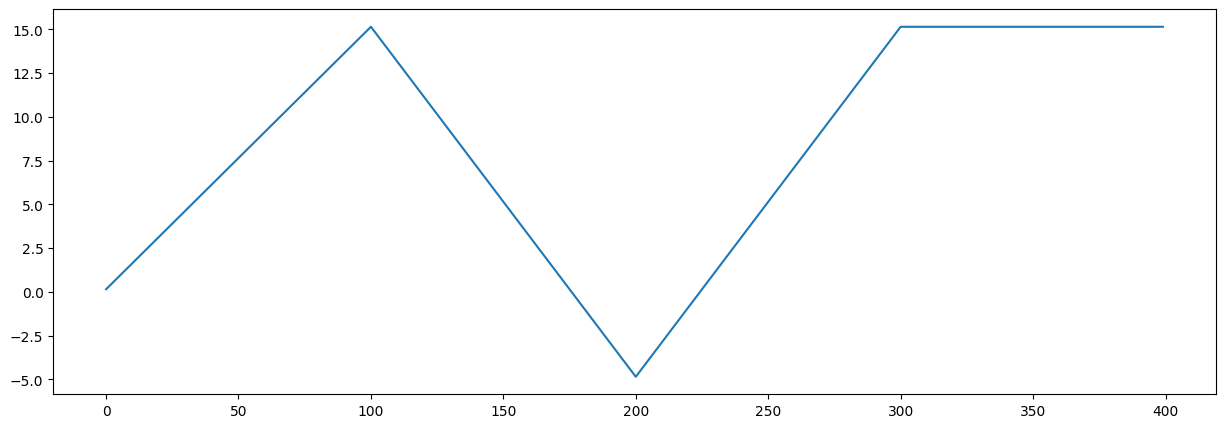

In [2]:
testCourseElevation = generateElevation(testCourse, 400)

plt.figure(figsize=(15, 5))

plt.plot(testCourseElevation)